In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

## 1. Import and Warehouse Data.

In [2]:
data = pd.read_csv('TelcomCustomer-Churn.csv')
data.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data.shape

(7043, 21)

## 2. Data Cleansing

#### We can see the data has 21 columns, and 7043 rows. We can drop the customerID column, as it won't be used in model building.

In [4]:
temp = pd.DataFrame(data.TotalCharges.str.isspace()) 
temp[temp['TotalCharges'] == True]

data = data.replace(' ', np.nan)
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### We can see some spaces in TotalCharges column, that we have replaced with NA values, and now should be dropped.

In [5]:
data.dropna(inplace=True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We have dropped the spaces from TotalCharges column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### There are no null values in the data. However, we will need to change Dtypes of some features. Let's see value counts to determine if some features should be turned to Categories or not.

In [7]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.00,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75


#### We can see that most of the features hold under 5 unique values. Those features can be converted to continuous variables using Label encoding. 

In [9]:
col= data.columns

for column in col:
    print(data[column].value_counts())
    print('-'*50)

8659-HDIYE    1
7325-ENZFI    1
4878-BUNFV    1
5998-DZLYR    1
6047-YHPVI    1
             ..
7000-WCEVQ    1
1513-XNPPH    1
6848-HJTXY    1
0411-EZJZE    1
3533-UVMOM    1
Name: customerID, Length: 7032, dtype: int64
--------------------------------------------------
Male      3549
Female    3483
Name: gender, dtype: int64
--------------------------------------------------
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
--------------------------------------------------
No     3639
Yes    3393
Name: Partner, dtype: int64
--------------------------------------------------
No     4933
Yes    2099
Name: Dependents, dtype: int64
--------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
--------------------------------------------------
Yes    6352
No      680
Name: PhoneService, dtype: int64
-------------------------------------------------

#### Further checking the features, we can see most of the categorical features have less than 5 unique values, so we can use label encoder to assign numbers. 

In [10]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.drop(columns='customerID', axis=1, inplace=True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


## 3. Data analysis and visualisation.

In [11]:
def barplot_perc(feature):
    sns.set(rc={'figure.figsize':(8,4)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 14) 
        
    plt.show()

In [12]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

#### We can see that most of the features can be visualised using barpots. We can pop 'tenure', and 'Monthly Charges' temporarily and get barplots for all other features.

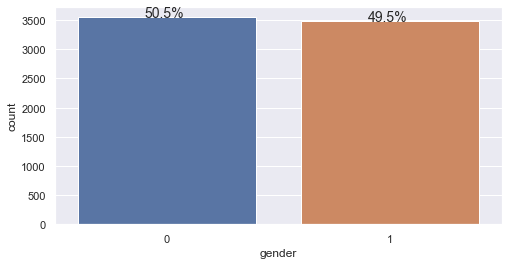

None


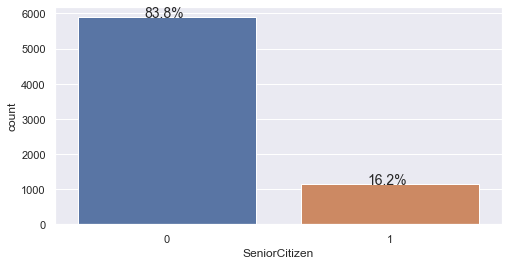

None


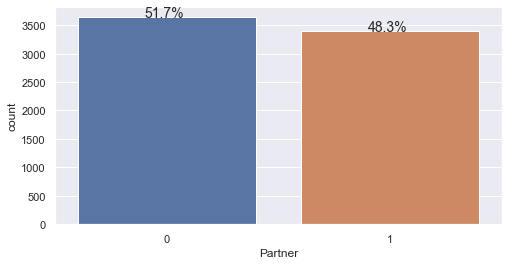

None


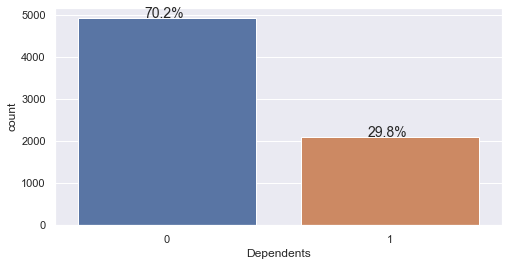

None


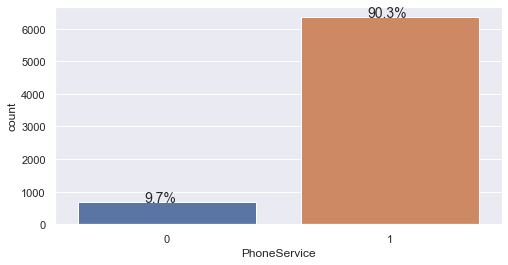

None


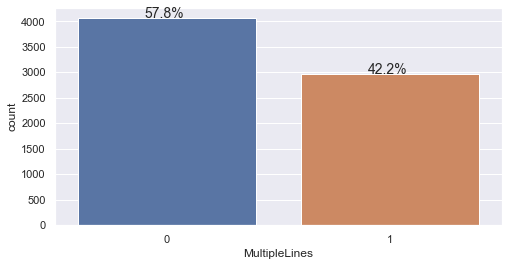

None


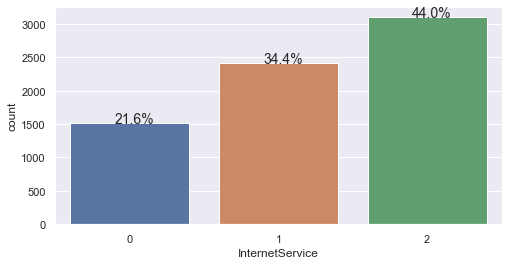

None


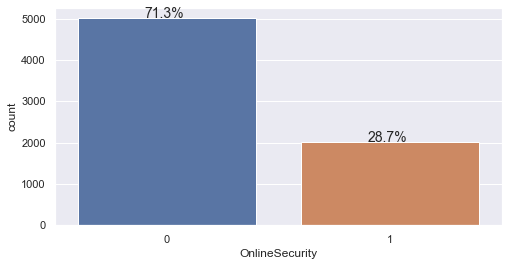

None


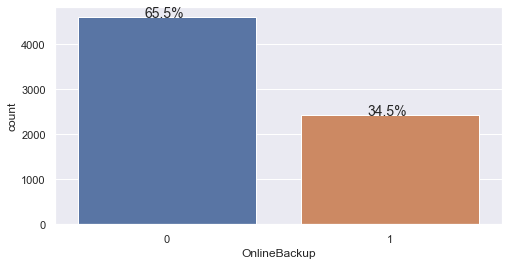

None


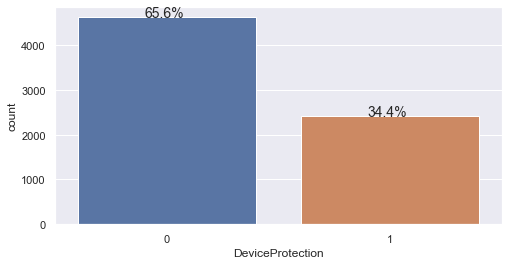

None


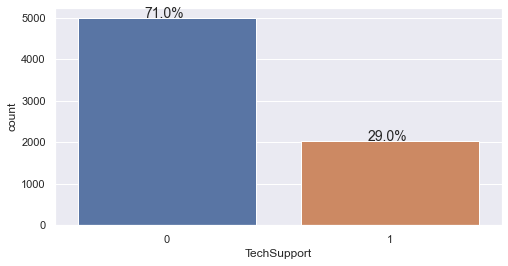

None


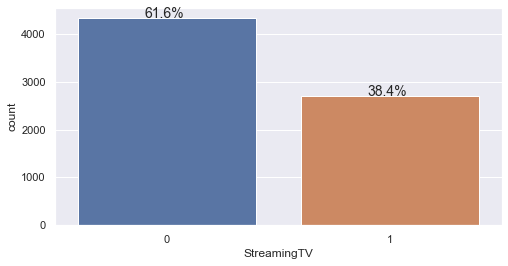

None


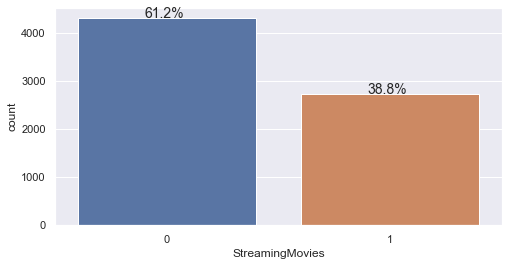

None


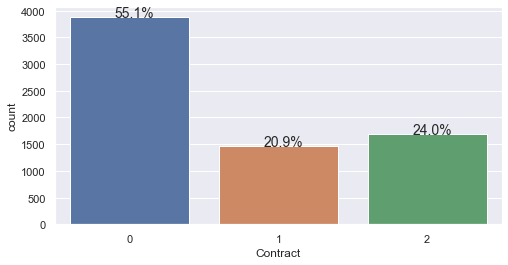

None


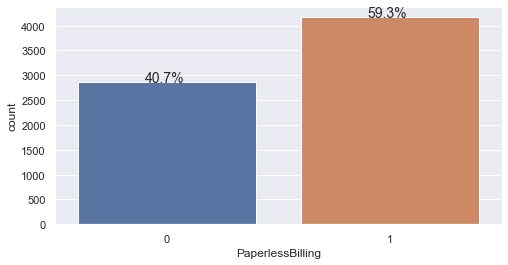

None


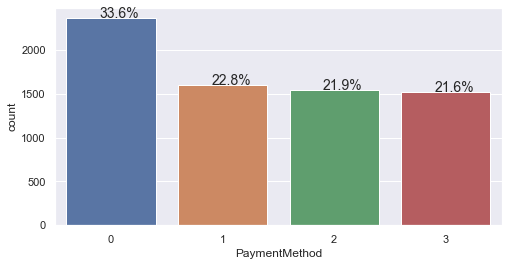

None


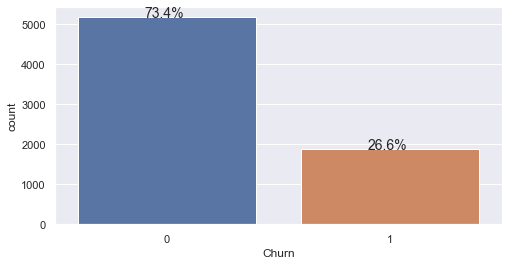

None


In [13]:
col = list (data.columns)
col.pop(4)
col.pop(-3)

for column in col:
    if data[column].dtypes == 'int64':
        print (barplot_perc(data[column])) 

## Analysis of above graphs

#### Gender feature has nice equal distribution, nearly 50-50. 
#### Senior Citizen has some disparity with only 16% Senior Citizens. 
#### Partner also has near equal distribution. 
#### Dependents has 70-30 distribution.
#### PhoneService has disparity with only 10% people without Phone Service.
#### Multiple Lines is fairly distributed with 57% people without, and 43% with multiplelines
#### Internet Services: 22% of the people have NO internet, 34% has DSL, and 44% has Fiber.
#### Online Services: We can see 70-30 ratio here, with only 30% people with Online Services.
#### Online Backup: With 65-35 ratio, only 35% people have Online Backup.
#### Device Protection: 35% people have Device protection, 65% people dont.
#### Tech Support: 29% people have Tech Support, 71% Dont.
#### Stream TV: 38% People Stream TV, 62% dont. 
#### Stream Movie: 38% People Stream Movies, 62% dont.
#### Contract: 55% people have Month-to-Month Contract, 20% have One year contract, and 25% have two year contract.
#### Paperless Billing: 60% people opt for paperless billing, 40% dont. 
#### Payment: 33% people chose electronic transfer, 23% people chose mailed check, 22% chose automatic bank transfer, and 22% chose automatic Credit Card payments, 
#### Churn: 27% people chutned out, while 73% did not. 


In [14]:
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, color='violet') 
    sns.displot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=True, ax=ax_hist2) 


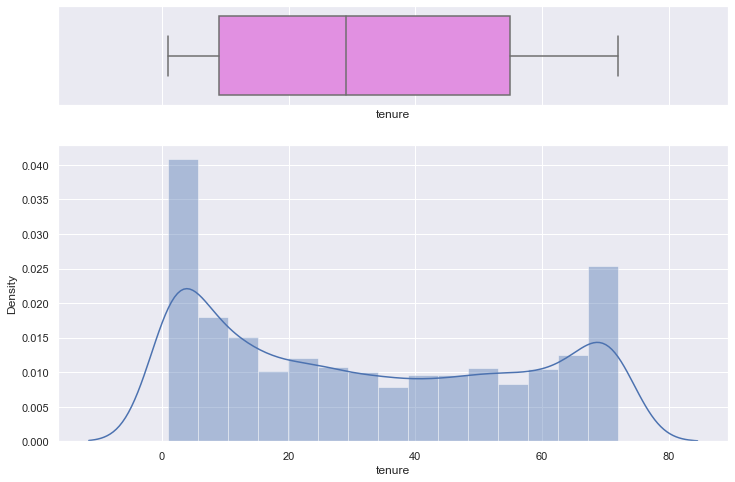

In [15]:
histogram_boxplot(data ['tenure'])

#### tenure feature is fairly distributed, with bimodal distribution.

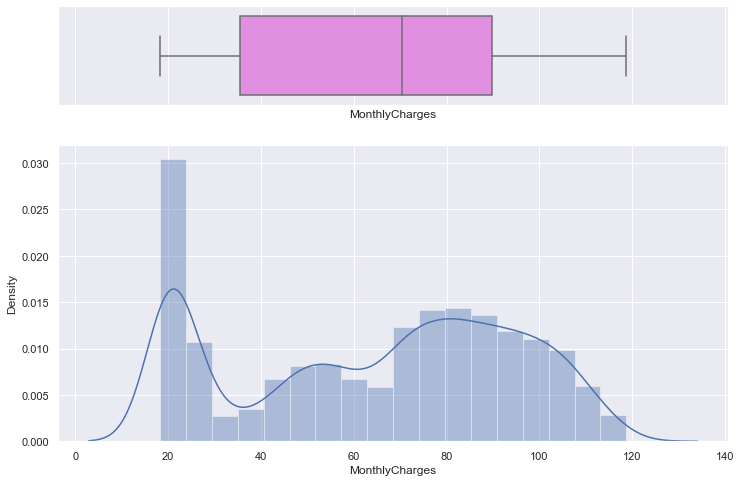

In [16]:
histogram_boxplot(data['MonthlyCharges'])

#### Monthly charges show uneven right skewed distribution.

## Bi-variate analysis

In [17]:
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Churn'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Churn'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Churn      0     1   All
gender                  
0       2619   930  3549
1       2544   939  3483
All     5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


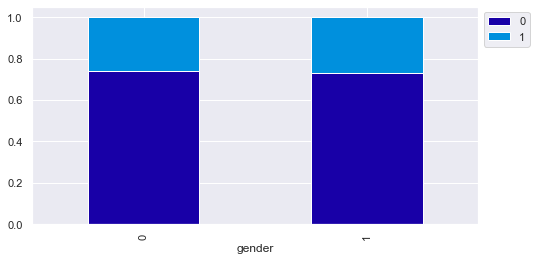

None
Churn             0     1   All
SeniorCitizen                  
0              4497  1393  5890
1               666   476  1142
All            5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


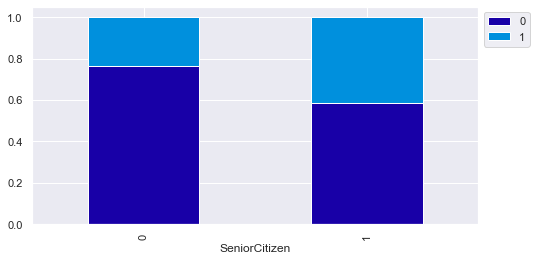

None
Churn       0     1   All
Partner                  
0        2439  1200  3639
1        2724   669  3393
All      5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


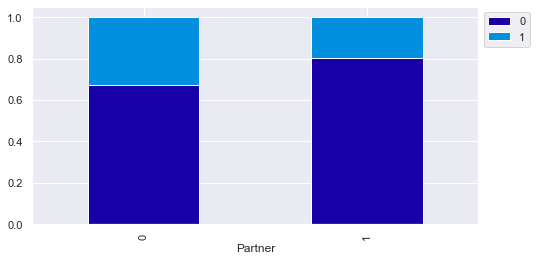

None
Churn          0     1   All
Dependents                  
0           3390  1543  4933
1           1773   326  2099
All         5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


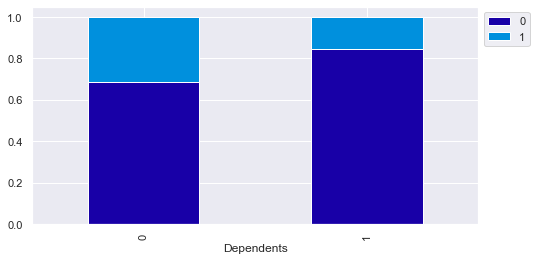

None
Churn            0     1   All
PhoneService                  
0              510   170   680
1             4653  1699  6352
All           5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


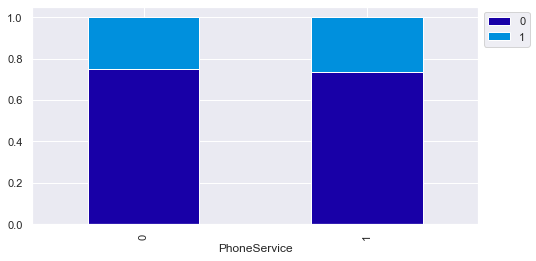

None
Churn             0     1   All
MultipleLines                  
0              3046  1019  4065
1              2117   850  2967
All            5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


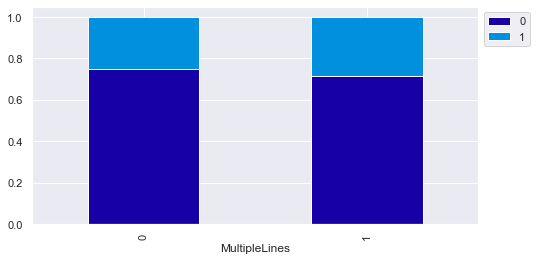

None
Churn               0     1   All
InternetService                  
0                1407   113  1520
1                1957   459  2416
2                1799  1297  3096
All              5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


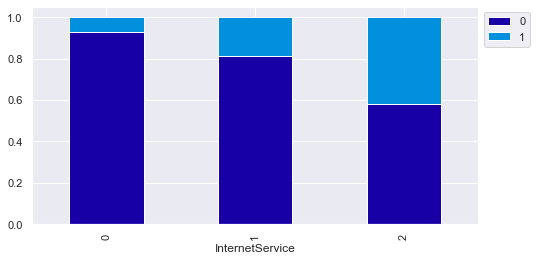

None
Churn              0     1   All
OnlineSecurity                  
0               3443  1574  5017
1               1720   295  2015
All             5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


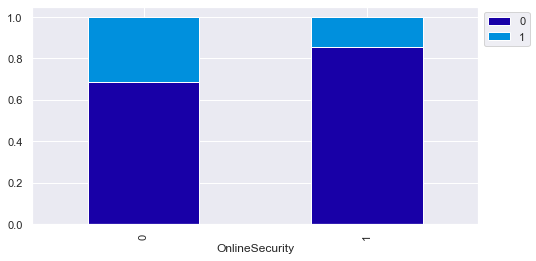

None
Churn            0     1   All
OnlineBackup                  
0             3261  1346  4607
1             1902   523  2425
All           5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


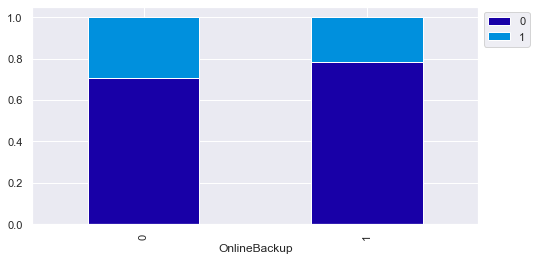

None
Churn                0     1   All
DeviceProtection                  
0                 3290  1324  4614
1                 1873   545  2418
All               5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


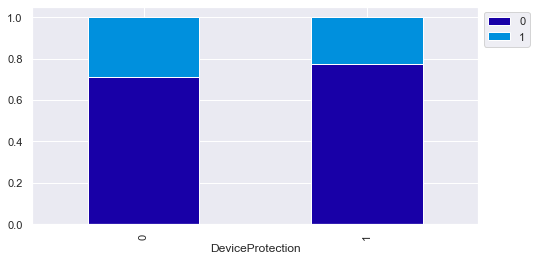

None
Churn           0     1   All
TechSupport                  
0            3433  1559  4992
1            1730   310  2040
All          5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


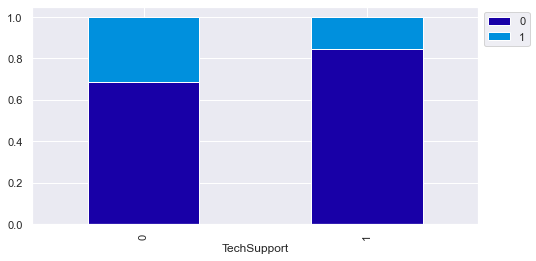

None
Churn           0     1   All
StreamingTV                  
0            3274  1055  4329
1            1889   814  2703
All          5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


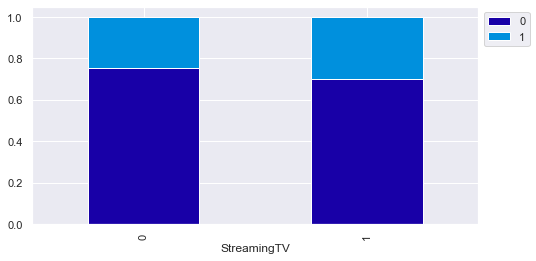

None
Churn               0     1   All
StreamingMovies                  
0                3250  1051  4301
1                1913   818  2731
All              5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


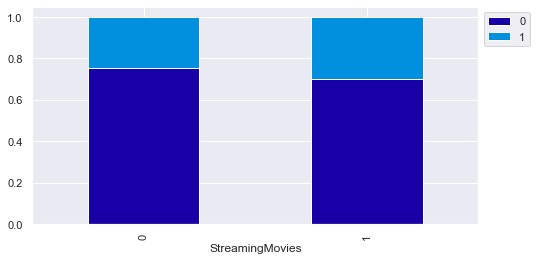

None
Churn        0     1   All
Contract                  
0         2220  1655  3875
1         1306   166  1472
2         1637    48  1685
All       5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


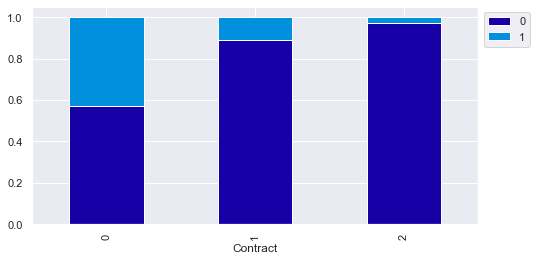

None
Churn                0     1   All
PaperlessBilling                  
0                 2395   469  2864
1                 2768  1400  4168
All               5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


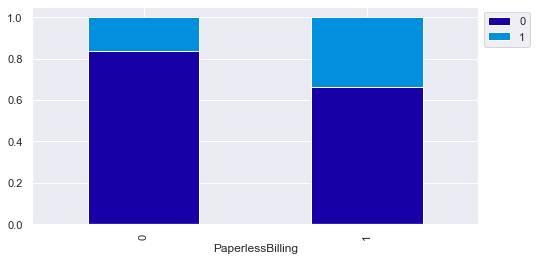

None
Churn             0     1   All
PaymentMethod                  
0              1294  1071  2365
1              1296   308  1604
2              1284   258  1542
3              1289   232  1521
All            5163  1869  7032
------------------------------------------------------------------------------------------------------------------------


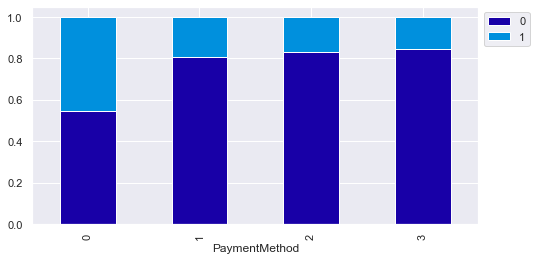

None


In [18]:
col = list (data.columns)
col.pop(4)
col.pop(-3)
col.pop(-1)

for column in col:
    if data[column].dtypes == 'int64':
        print (stacked_plot(data[column])) 

#### Bi-variate analysis shows us that gender, Multiple Lines, Device protection, Streaming TV, Streaming Movies, have No or marginal affect on the Churn rate.

#### We can see that people with the following attributes are churning more than compared to others:

#### DSL Users, Without Online Security, without Online Backup, Without Tech Support, Monthly contract users, People opting Paperless Billing, People opting Electronic Payment Transfer. 

#### So we shall target people with these traits to lower our Churn Rate.

#### We can also see that people with automatic payments are less likely to Churn, we can urge people to join automatic payment services, it can lower the Churn rate.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

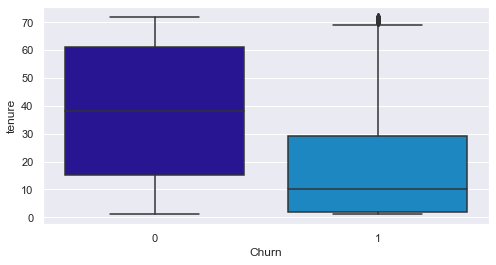

In [19]:
sns.boxplot(data['Churn'], data['tenure'])

#### People with less tenure are more likely to Churn with some outliers.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

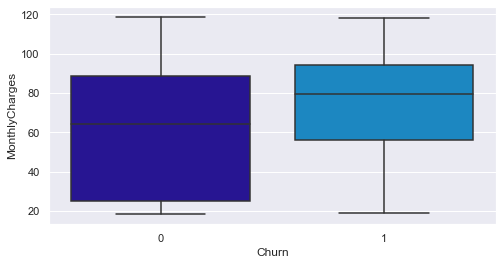

In [20]:
sns.boxplot(data['Churn'], data['MonthlyCharges'])

#### We can see that people with higher average monthly charges are more likely to Churn. Although the upper limit is not that different. So it is not very clear.

#### We can say that people with lower Monthly charges are less likely to Churn. 

## Multivariate Analysis

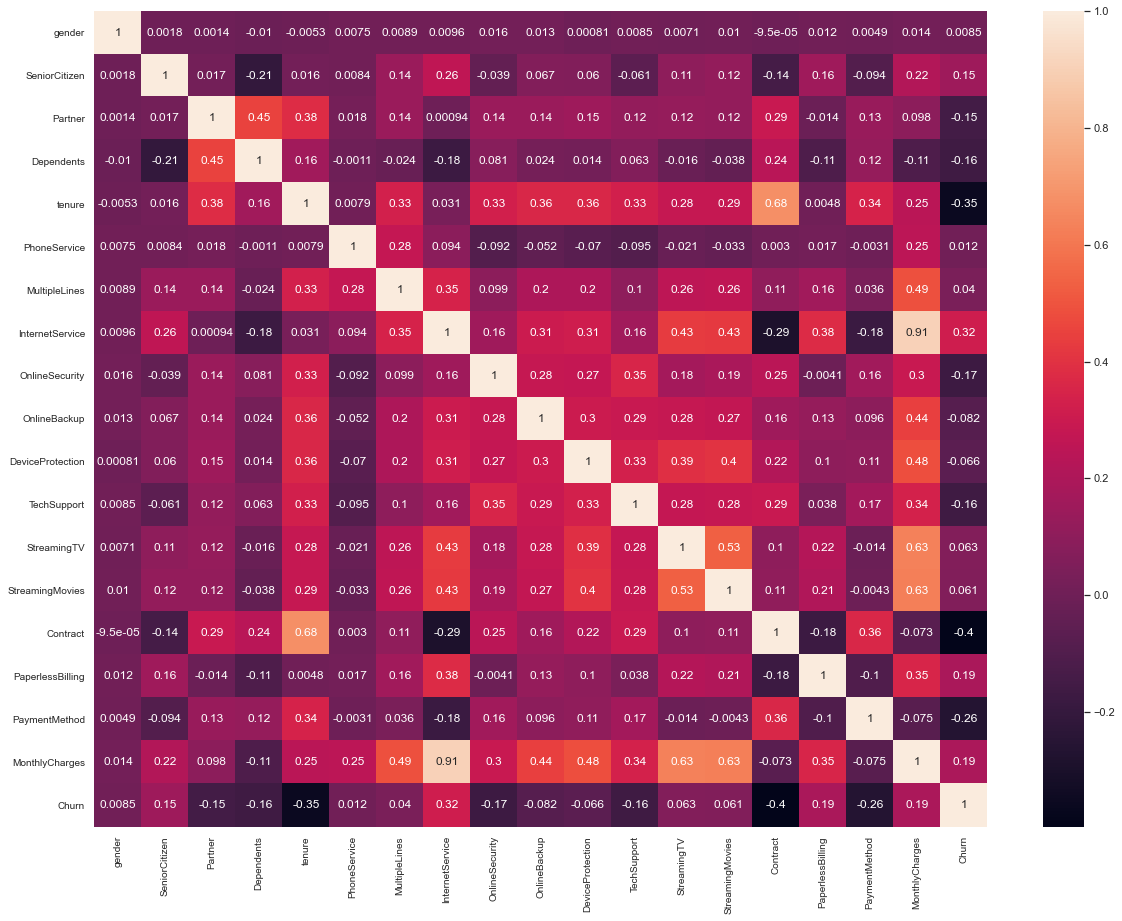

In [21]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.495307,0.500014,0.00,0.0000,0.00,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.00,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.00,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.00,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.00,1.0000,1.00
MultipleLines,7032.0,0.421928,0.493902,0.00,0.0000,0.00,1.0000,1.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.00,2.0000,2.00
OnlineSecurity,7032.0,0.286547,0.452180,0.00,0.0000,0.00,1.0000,1.00
OnlineBackup,7032.0,0.344852,0.475354,0.00,0.0000,0.00,1.0000,1.00


## Segregating Predictor and Target variables 

In [23]:
X=data.drop(columns='Churn')
y=data['Churn']

In [24]:
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])
data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

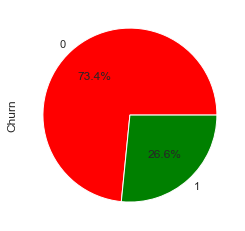

In [25]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=('red','green'))


#### We can see that the data is imbalanced with 73.5 to 26.5 ratio.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [27]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7032, 19)
Shape of X after SMOTE: (10326, 19)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn, dtype: float64

<AxesSubplot:ylabel='Churn'>

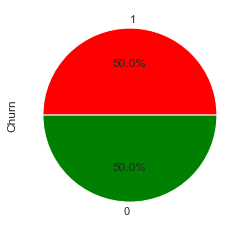

In [29]:
y_sm.value_counts().plot.pie(autopct='%1.1f%%', colors=('red','green'))


#### Target variable is now completely balanced using SMOTE. 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=10)

In [31]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

# Building a Decision Tree Classifier Model

In [32]:
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
get_metrics_score(model_entropy)


Accuracy on training set :  0.9988931931377975
Accuracy on test set :  0.7827630729502905
Recall on training set :  0.9977715877437325
Recall on test set :  0.7762237762237763
Precision on training set :  1.0
Precision on test set :  0.791828793774319


In [33]:
dtree_estimator = DecisionTreeClassifier(criterion= 'entropy',random_state=22)

parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10]}
scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=22)

In [34]:
get_metrics_score(dtree_estimator)

Accuracy on training set :  0.7690924183729939
Accuracy on test set :  0.7704970948999355
Recall on training set :  0.8707520891364903
Recall on test set :  0.8709472345835982
Precision on training set :  0.7217732625259755
Precision on test set :  0.7294994675186368


#### After Hyperparameter Tuning, we are able to get 77% Accuracy on training, and 77% on Testing data.

#### Let's manually tune the model and try to get better results

In [35]:
model_entropy_pruned1=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

model_entropy_pruned1.fit(X_train, y_train)

get_metrics_score(model_entropy_pruned1)

Accuracy on training set :  0.8035417819590481
Accuracy on test set :  0.7963202065848934
Recall on training set :  0.8565459610027855
Recall on test set :  0.8423394787031151
Precision on training set :  0.7726130653266332
Precision on test set :  0.7757611241217799


In [36]:
model_entropy_pruned1=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

model_entropy_pruned1.fit(X_train, y_train)

print ('Performance on Training data is   ',model_entropy_pruned1.score(X_train, y_train))  # performance on train data)
print ('Performance on Test data is       ',model_entropy_pruned1.score(X_test, y_test))  # performance on test data)

Performance on Training data is    0.8035417819590481
Performance on Test data is        0.7963202065848934


In [37]:
model_entropy_pruned2=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)

model_entropy_pruned2.fit(X_train, y_train)

print ('Performance on Training data is   ',model_entropy_pruned2.score(X_train, y_train))  # performance on train data)
print ('Performance on Test data is       ',model_entropy_pruned2.score(X_test, y_test))  # performance on test data)

Performance on Training data is    0.7696458218040951
Performance on Test data is        0.7695287282117496


#### We can see that 'Model_entropy_Pruned1' with Max Depth 5, and Min Sample Leaf 5, we are getting almost 80% accuracy on both training, and Testing data. 

In [38]:
feat_importance = model_entropy_pruned1.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(X.columns, model_entropy_pruned1.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
Contract,0.622135
MonthlyCharges,0.133309
OnlineSecurity,0.079998
TechSupport,0.039097
tenure,0.037831
OnlineBackup,0.023307
PhoneService,0.023135
InternetService,0.016753
TotalCharges,0.011307
Dependents,0.005035


#### We can see the feature importance here. 

In [39]:
preds_pruned = model_entropy_pruned1.predict(X_test)
preds_pruned_train = model_entropy_pruned1.predict(X_train)

print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))


0.8035417819590481
0.7963202065848934


In [40]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [70]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.79632


#### Result of Decision Tree classifier, to be compared with other models later. 

# Building Random Forest Classifier Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.796320
0,Random Forest,0.841511


In [57]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

get_metrics_score(rfcl)

Accuracy on training set :  0.9988931931377975
Accuracy on test set :  0.8395739186571982
Recall on training set :  0.9991643454038998
Recall on test set :  0.845518118245391
Precision on training set :  0.998608017817372
Precision on test set :  0.8396464646464646


### Hyperparameter Tuning 

In [58]:
rf_tuned = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(3,9)) + [None],
                'min_samples_leaf': np.arange(2,5),
                'n_estimators': np.arange(10,60,10)}


grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=50,
                       oob_score=True, random_state=1)

In [59]:
get_metrics_score(rf_tuned)

Accuracy on training set :  0.7901217487548423
Accuracy on test set :  0.7966429954809554
Recall on training set :  0.8813370473537604
Recall on test set :  0.8836617927527018
Precision on training set :  0.7435957696827262
Precision on test set :  0.7566684812193795


# Building Adaboost Ensemble Algorithm model.

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.796320
0,Random Forest,0.841511
0,Adaboost,0.811491


In [61]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(10,50,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=1)

In [62]:
get_metrics_score(abc_tuned)

Accuracy on training set :  0.7464028776978417
Accuracy on test set :  0.7527437056165268
Recall on training set :  0.9270194986072423
Recall on test set :  0.9256198347107438
Precision on training set :  0.6793223106756481
Precision on test set :  0.691686460807601


#### The above data is hyperparameter tuned, changing the values of hyperparameters and keeping the final acceptable values.

# Building Bagging Classifier Model

In [73]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.796320
0,Random Forest,0.841511
0,Adaboost,0.811491
0,Bagging,0.833118


### Hyperparameter Tuning

In [64]:
bagging_estimator_tuned = BaggingClassifier(random_state=22)

parameters = {'max_samples': [0.7,0.8], 
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=50, random_state=22)

In [65]:
get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9886552296624239
Accuracy on test set :  0.8331181407359587
Recall on training set :  0.9883008356545961
Recall on test set :  0.8328035600762873
Precision on training set :  0.9888517279821628
Precision on test set :  0.8375959079283888


# Building Gradient Boosting Model

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.796320
0,Random Forest,0.841511
0,Adaboost,0.811491
0,Bagging,0.833118
0,Gradient Boost,0.820852


In [68]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [100,150,200],
    "max_features":[0.7,0.8,0.9]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=150, random_state=1)

In [69]:
get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8526563364692861
Accuracy on test set :  0.8318269851517108
Recall on training set :  0.8749303621169916
Recall on test set :  0.8506039415130324
Precision on training set :  0.8360393931328187
Precision on test set :  0.8238916256157636


#### The above data is hyperparameter tuned, changing the values of hyperparameters and keeping the final acceptable values.

### After Hyperparameter Tuning most of the models are performing well.

#### Decision Tree Classifier                : 77% on training, 77% on Testing. 
#### Decision Tree Classifier manual tuning  : 80% on training, 80% on testing.
#### Random Forest Classifier after tuning   : 79% on training, 79% on testing. 
#### Adaboost Classifier after tuning        : 74% on training, 75% on testing.  
#### Bagging Classifier after tuning         : 98% on training, 83% on testing. 
#### GradientBoost Model after tuning        : 85% on training, 83% on testing. 


### Judging from the above mentioned stats, It would be best to go with Tuned Decision Tree classifier Model with Max depth 5, and min sample 5. As it is producing same results on both training and testing data.

### We can also use Gradient Boost as it is providing better accuracy, but there is slight difference in training and Testing score. 

### Pickle the Model


In [84]:
import pickle

Best_Model = model_entropy_pruned1
model_entropy_pruned1=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
model_entropy_pruned1=model_entropy_pruned1.fit(X_train, y_train)

file = 'Best_model.pkl'
fileobj = open(file, 'wb')
pickle.dump(model_entropy_pruned1, fileobj)
fileobj.close()

### Loading and Testing the Pickled model

In [85]:
file = 'Best_model.pkl'
fileobj = open(file,'rb')
Best_model = pickle.load(fileobj)
print (Best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)


In [86]:
Best_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
model_entropy_pruned1.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

## 6. CONCLUSION AND IMPROVISATION

#### The data captured was adequately filtered with a few missing values which were a bit tricky to find,
#### Distribution of most of the data was nice, with some disparities.
#### The data was large in size, which helped building more models. 
#### Target variable was imbalanced, which had to be balanced with SMOTE. 
#### DSL Users, Without Online Security, without Online Backup, Without Tech Support, Monthly contract users, People opting Paperless Billing, People opting Electronic Payment Transfer.
#### So we shall target people with these traits to lower our Churn Rate.
#### We can also see that people with automatic payments are less likely to Churn, we can urge people to join automatic payment services, it can lower the Churn rate.


### Things to be improved: 
#### We can try to avoid target imbalances.
#### Filter null values, hidden as spaces or special characters. 
#### Quantity was good, but can be improved. 



#### We created several models which were very close competetors after Hyperparameter Tuning. But a simple Decision Tree classifier with max Depth 5, and min sample 5 surpassed all other complex models producing 80% accuracy on train and Test data. 

